# Using the [reggae](https://pbjam.readthedocs.io/en/latest/star.html#pbjam.reggae.MyMainWindow) class

TODO

## Preparing the data
The [star](https://pbjam.readthedocs.io/en/latest/star.html#pbjam.star.star) class takes [lightkurve.periodogram](https://docs.lightkurve.org/api/lightkurve.periodogram.Periodogram.html) objects as data input, while the remaining parameters are identical to those for [session](https://pbjam.readthedocs.io/en/latest/session.html#pbjam.session.session) (although lists are not allowed here). 

Let's create a [Lightkurve lightcurve](https://docs.lightkurve.org/api/lightkurve.lightcurve.LightCurve.html) object and then compute the periodogram. 

In [1]:
import lightkurve as lk
import pbjam as pb
print(f'Lightkurve version {lk.__version__}')
print(f'PBjam version {pb.__version__}')

Checkpoint exception raise
Lightkurve version 1.8.0
PBjam version 0.2.0


While the PDCSAP pipeline does a pretty good job in preparing light curves for asteroseismology, we might want to perform some manipulation of the data. Since we're using [Lightkurve](https://docs.lightkurve.org/), for the purposes of this exercise we'll just use some of the built-in functions.

In [2]:
lcs = lk.search_lightcurvefile('KIC4448777').download_all()
lc = lcs.PDCSAP_FLUX.stitch().normalize().flatten(window_length=401).remove_outliers(4)

/Users/davies/Library/Python/3.7/lib/python/site-packages/lightkurve/lightcurve.py:674: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


We can have a quick look at the time series to check that everything looks good

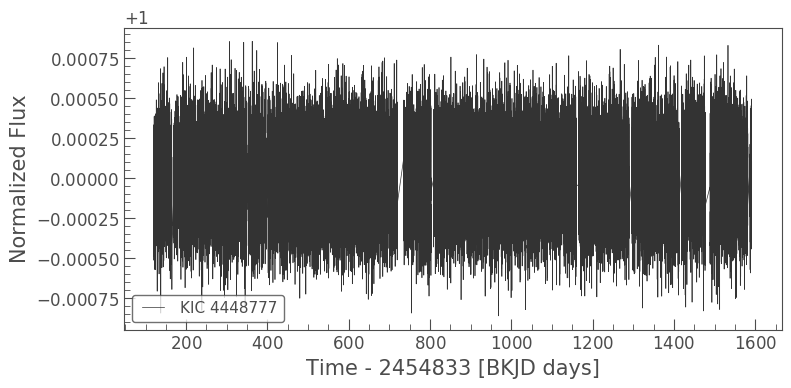

In [3]:
lc.plot()

Now lets compute the power density spectrum

In [4]:
pg = lc.to_periodogram(normalization='psd', minimum_frequency=150.0)

The functions in PBjam work best if you are using the SNR spectrum. That is, the powerspectrum with the background noise level divided out. Again, this can be done manually, but lightkurve as a built-in function for this too, so for the purposes of this tutorial we'll just use that.

In [5]:
pg = pg.flatten()

Again, lets just have a quick look to make sure the power spectrum looks good

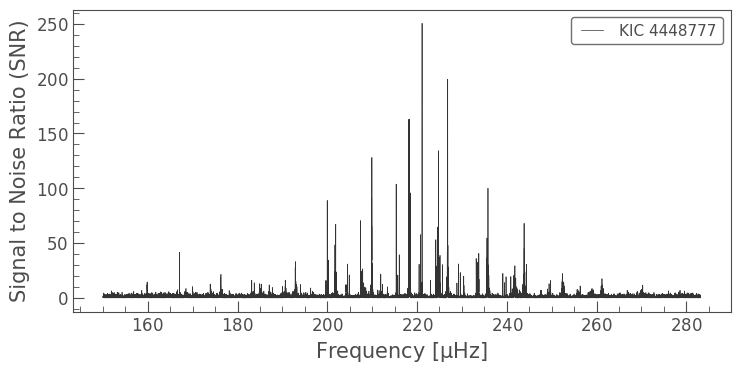

In [6]:
pg.plot()

## Alright, time to peakbag
We'll start by defining some of the physical parameters of the star we're looking at, in this case we downloaded the lightcurve for KIC4448777. 

**Note:** When calling the [star](https://pbjam.readthedocs.io/en/latest/star.html#pbjam.star.star) class here we don't have actually have to use the KIC identifier as the ID, we can pick any name we want. Only [session](https://pbjam.readthedocs.io/en/latest/session.html#pbjam.session.session) needs a proper identifier, since it uses [Lightkurve.search_lightcurvefile](https://docs.lightkurve.org/api/lightkurve.search.search_lightcurvefile.html).

In [7]:
ID = 'catname'
numax = (220.0, 3.0)
dnu = (16.97, 0.05)
teff = (4750, 100)
bp_rp = (1.34, 0.1)

Now that we have a power spectrum we can initialize the [star](https://pbjam.readthedocs.io/en/latest/star.html#pbjam.star.star) class instance. 

In [8]:
st = pb.star(ID, pg, numax, dnu, teff, bp_rp)

Like [session](https://pbjam.readthedocs.io/en/latest/session.html#pbjam.session.session), the [star](https://pbjam.readthedocs.io/en/latest/star.html#pbjam.star.star) class has a 'do-it-all' functionality, which an be used by calling the class instance:

Starting KDE estimation


/Users/davies/Code/PBjam/pbjam/priors.py:124: UserWarning: Only 60 star(s) near provided numax. Expanding the range to include ~100 stars.
  'Expanding the range to include ~100 stars.')


Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.


2020-03-19, 14:10:54 - matplotlib.legend: No handles with labels found to put in legend.


Starting asymptotic peakbagging
Steps taken: 2000
Chains reached stationary state after 2000 iterations.
Starting peakbagging


2020-03-19, 14:14:17 - pymc3   : Auto-assigning NUTS sampler...
2020-03-19, 14:14:17 - pymc3   : Initializing NUTS using adapt_diag...
2020-03-19, 14:14:20 - pymc3   : Sequential sampling (2 chains in 1 job)
2020-03-19, 14:14:20 - pymc3   : NUTS: [back, height2, height0, l2, l0, width2, width0]


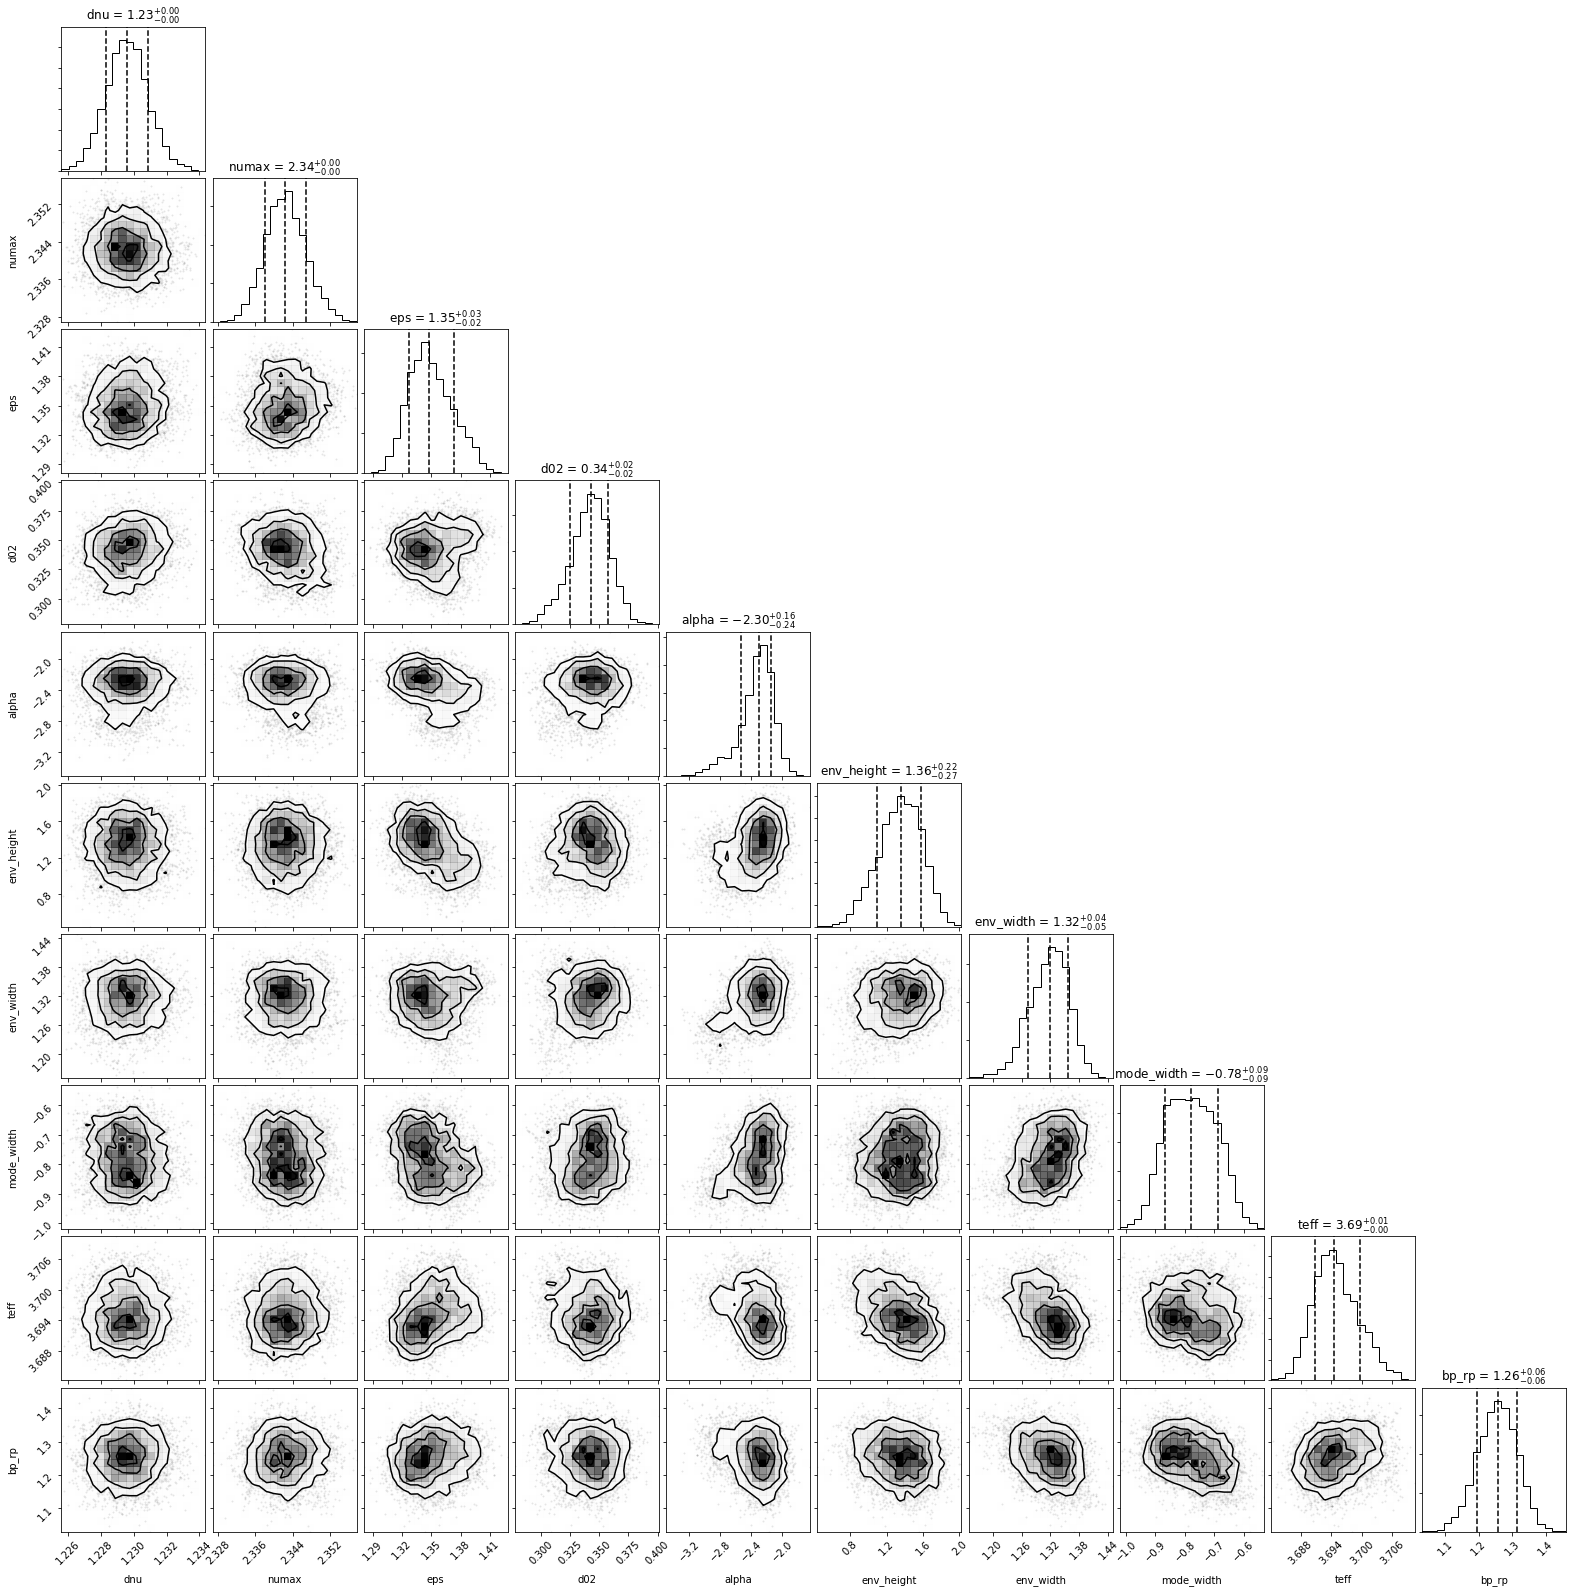

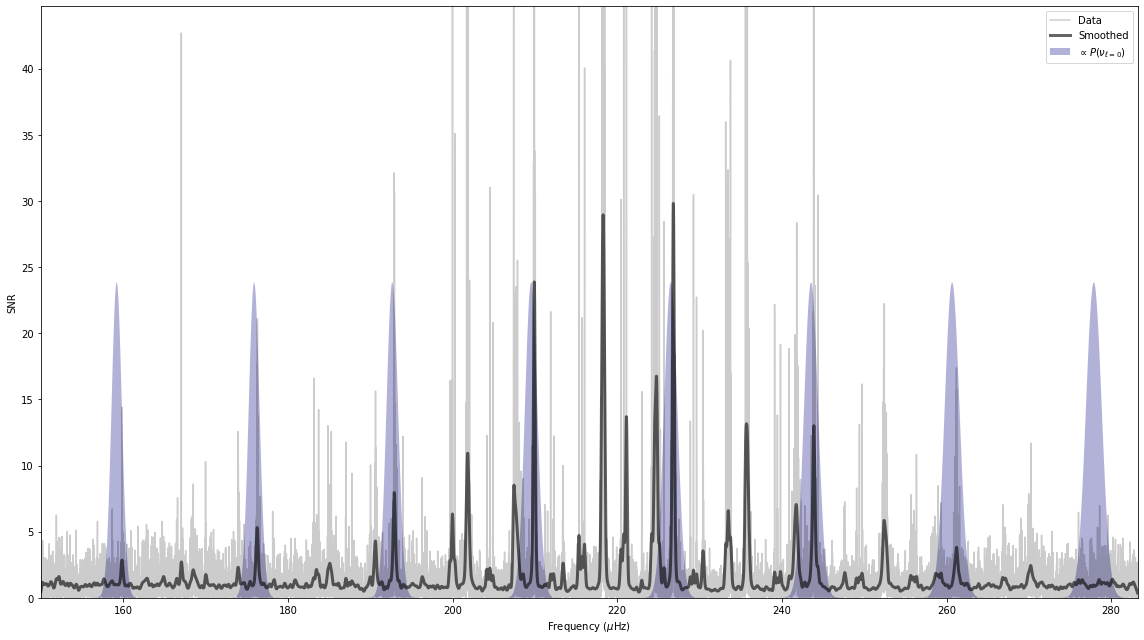

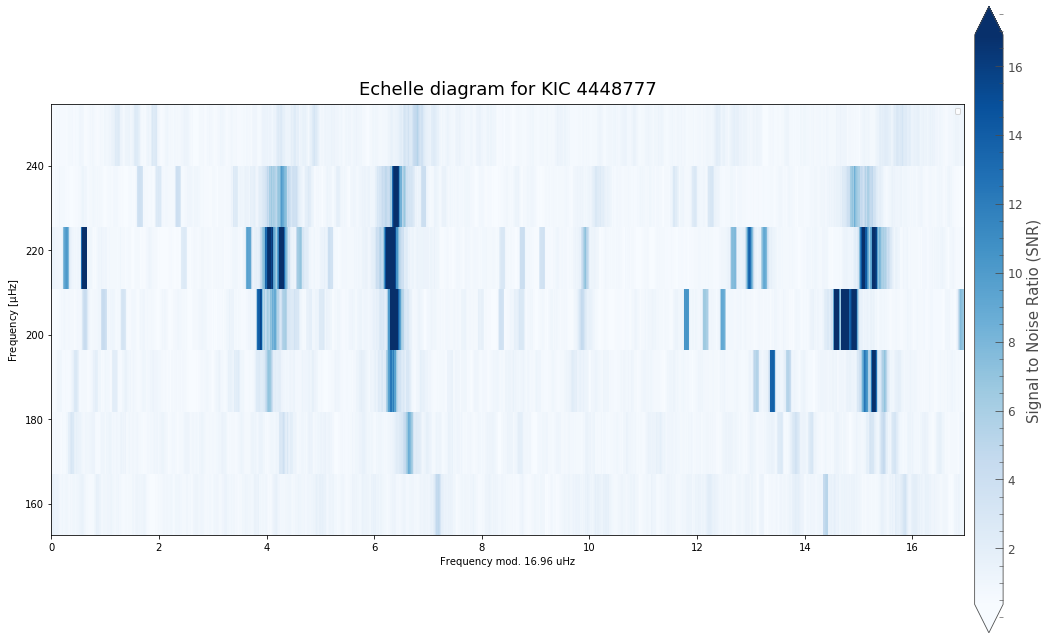

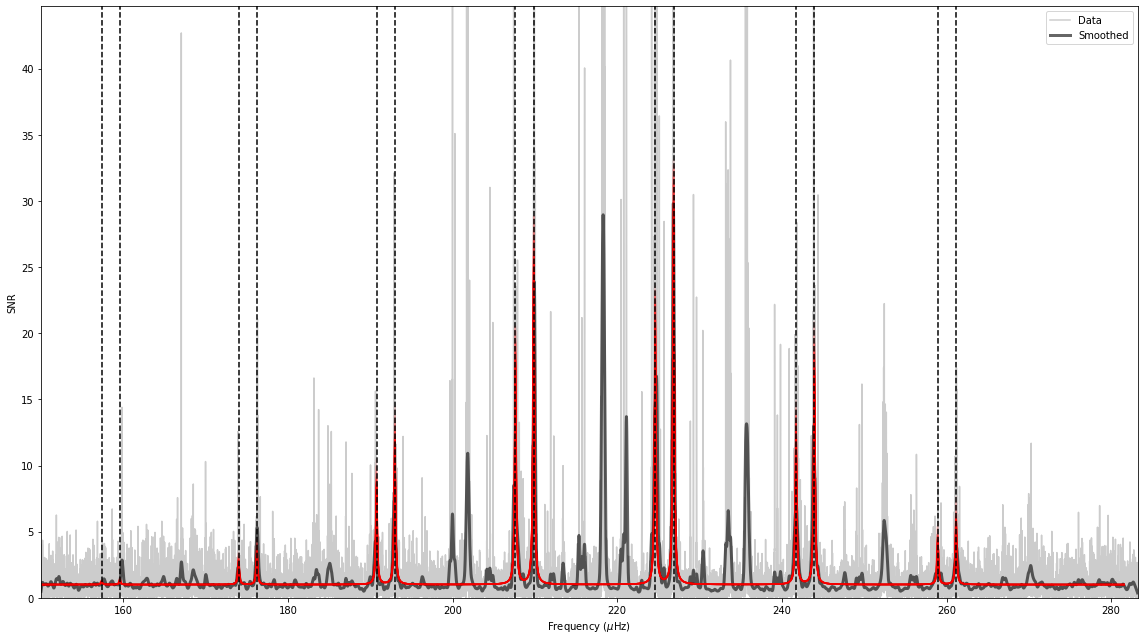

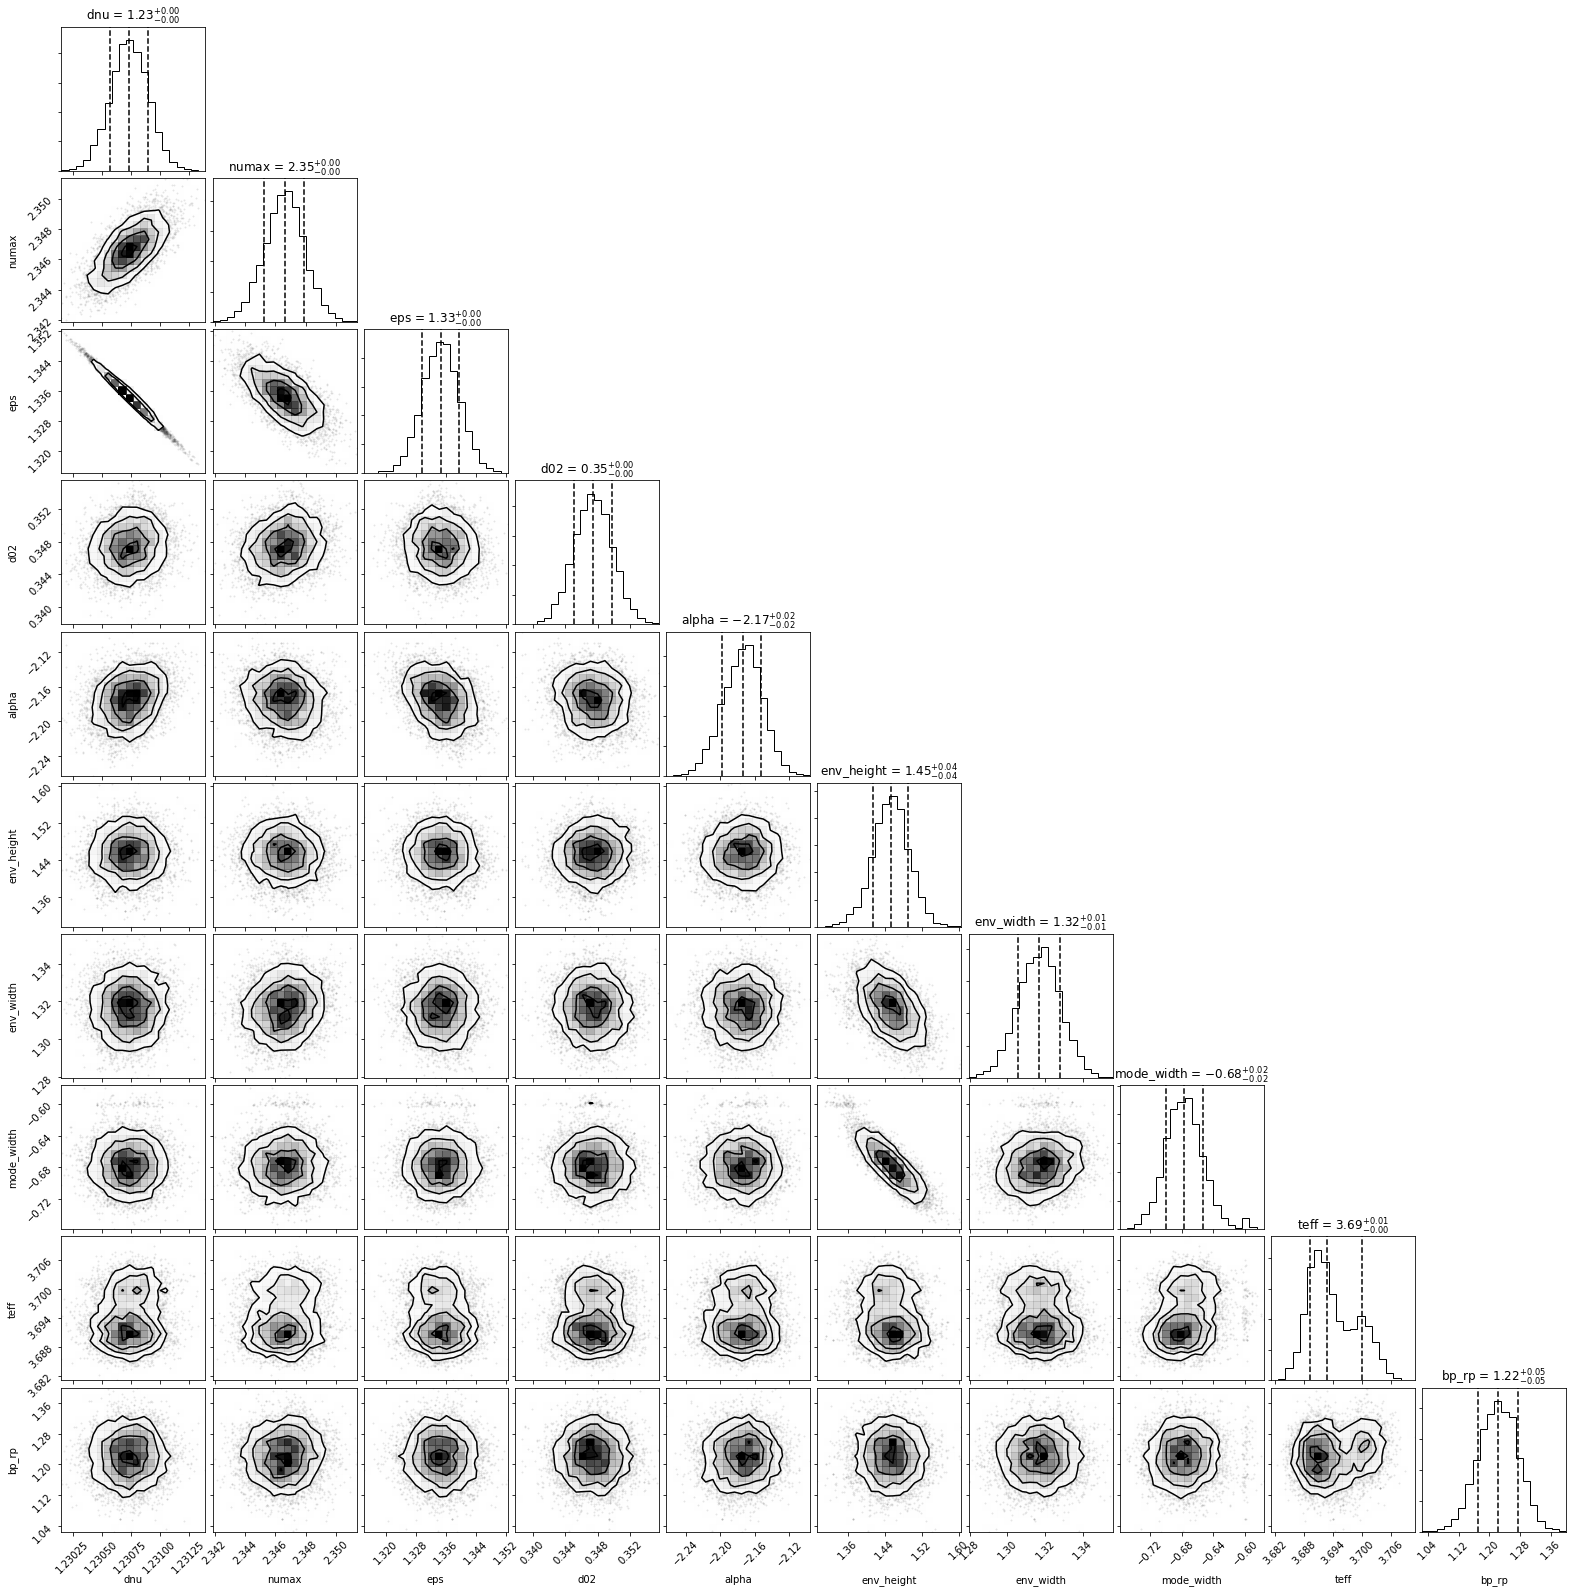

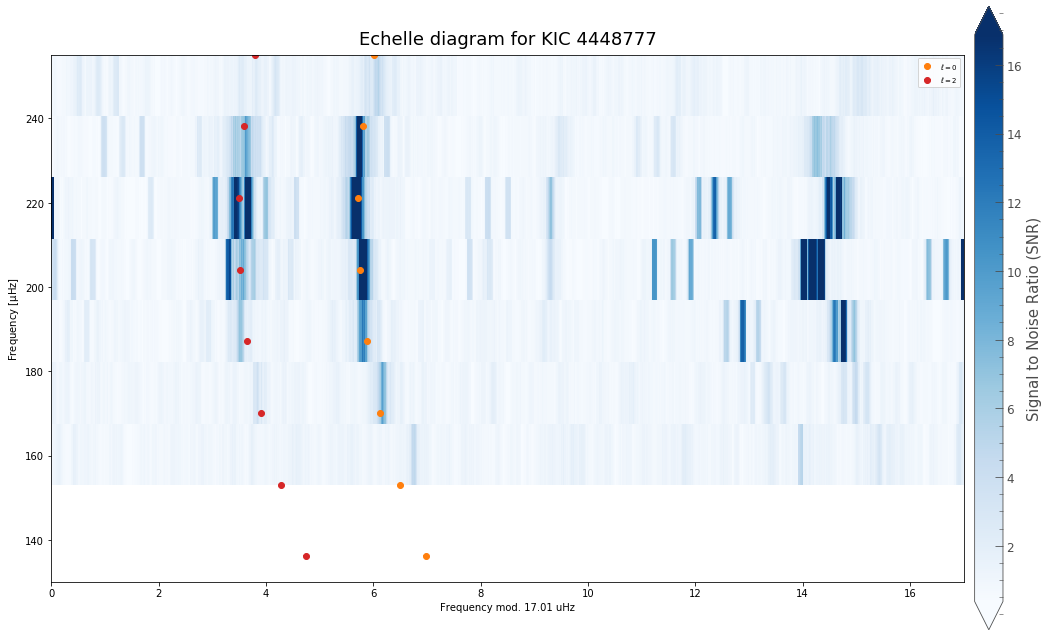

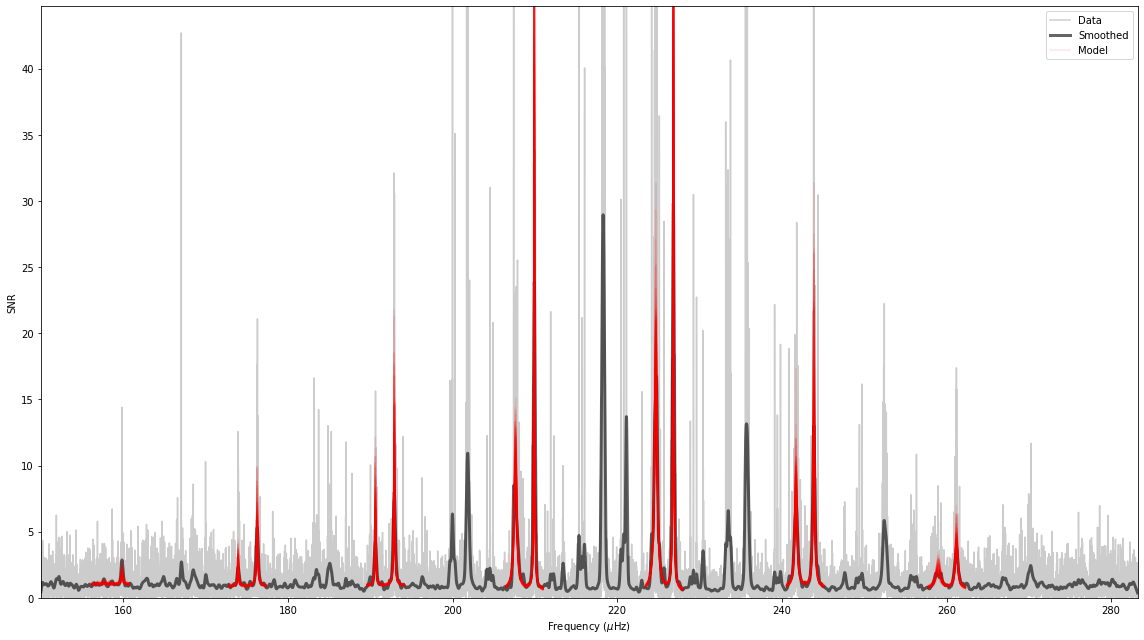

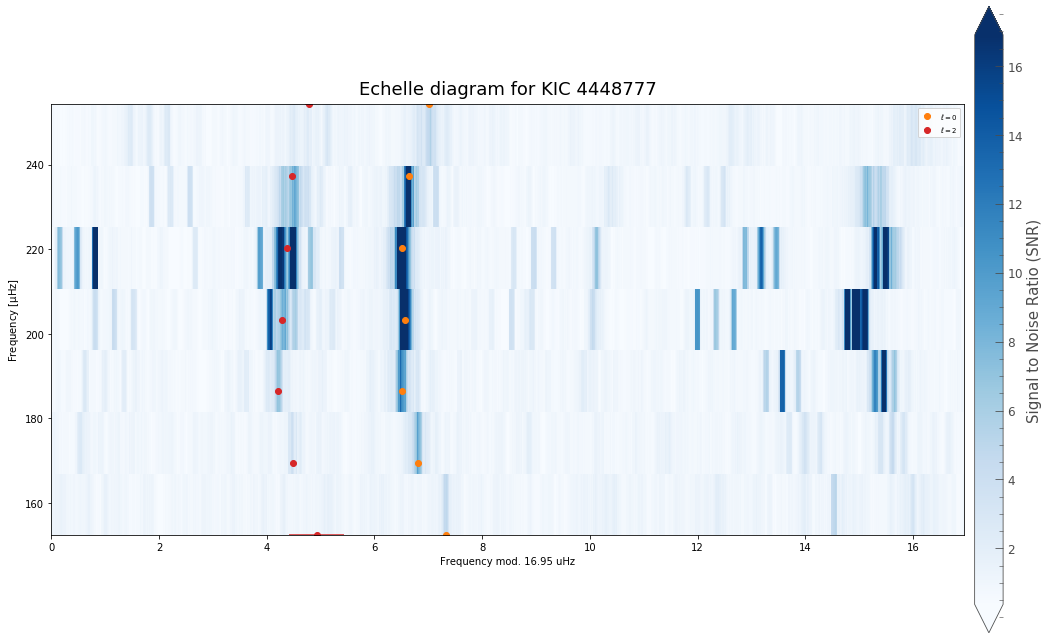

In [9]:
st(norders = 8, make_plots=True)

In [11]:
import pickle
pickle.dump(st, open( "sa_4448777.p", "wb" ))

In [1]:
import pickle
st = pickle.load( open( "sa_4448777.p", "rb" ) )

Checkpoint exception raise


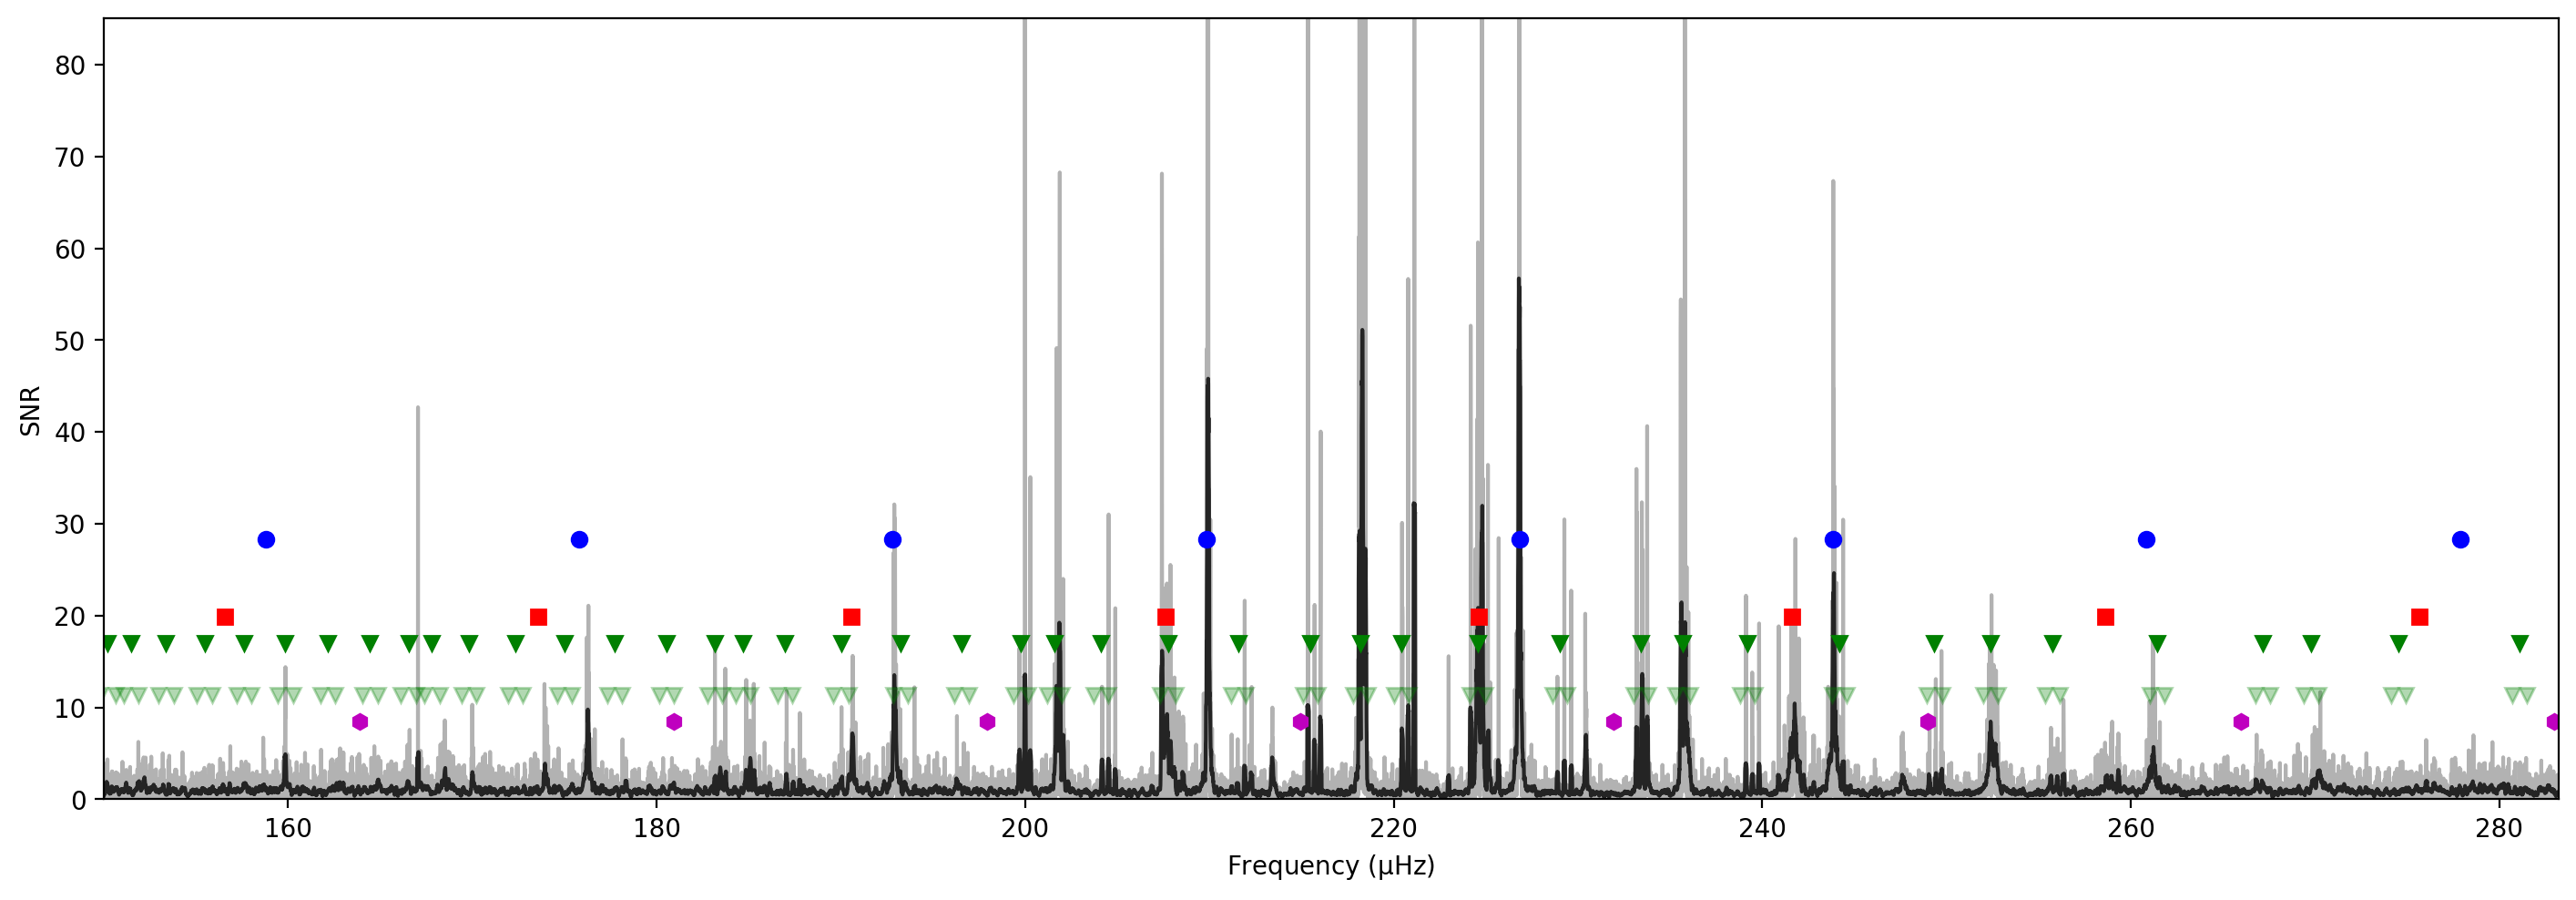

In [3]:
st.run_reggae()

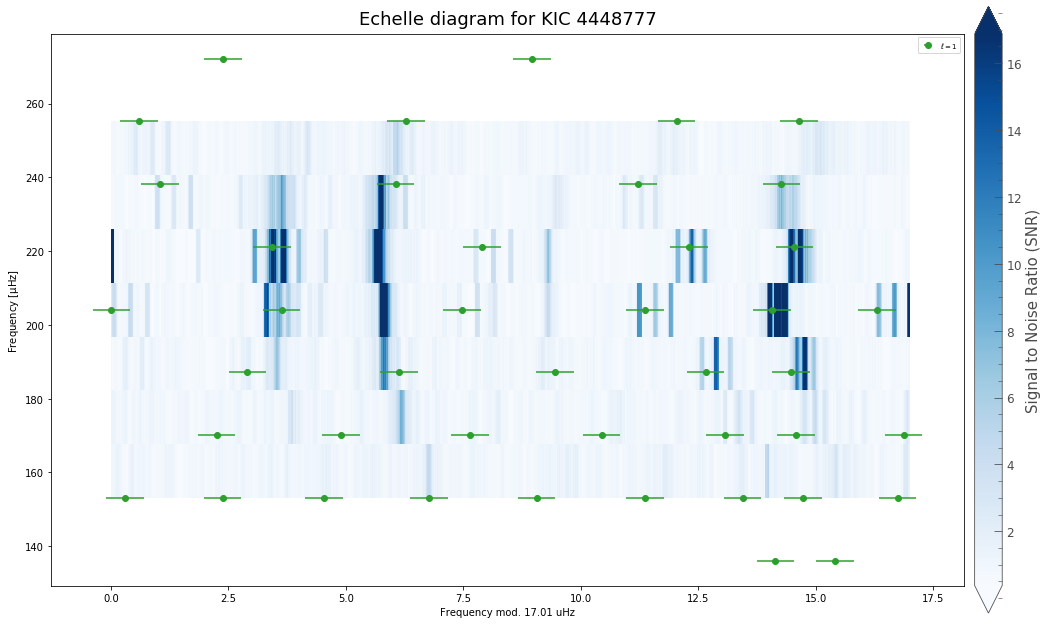

In [4]:
st.reggae.plot_echelle();